<a href="https://colab.research.google.com/github/0Zorro0/Employees_Attrition_Classification/blob/main/Projekt_Klasyfikacja_23_05_2023_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Treść zadania

Pliki (dane):

	attrition.csv - w tym pliku znajduje się klasa (etykieta). Dodatkowo, znajduje się id pracownika (EmployeeNumber) - tą kolumnę należy wykorzystać do połączenia kolumn w poszczegónych plikach

	df1.csv, df2.csv – pliki z cechami i id pracownika (EmployeeNumber).

	test_target.csv – dane testowe.

	Należy połączyć dane z plików df1 i df2 w jeden DataFrame (oba pliki zawierają dane tych samych pracowników, ale inne cechy - chcemy wykorzystać wszystkie).
	Ponieważ mamy podział na train/test ( na podstawie pliku test_target), należy po połączeniu cech, podzielić je według tego podziału - dzięki temu będziecie mogli porównać swoje wyniki.

Proces:

	-Przeprowadzić EDA (Exploratory Data Analysis)
		-np. Czy występują outiery, puste wartości
		-Sprawdzić, czy zbiór jest zrównoważony
		-Wizualizuj dane! Przykład: https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
		-Sprawdzić korelacje cech
		-Dokonać analizy wyników


	-Przeprowadzić Feature Engineering
		-W tym categorical encoding (przykład: https://medium.com/analytics-vidhya/categorical-encoding-with-pandas-get-dummies-d6f1ae6a3e06)
	-Dokonać treningu modelu
		-Pamiętaj, aby za każdym razem pokazywać miary jakości (Accuracy, Precision, Recall, F1-Score...)

		-Analiza wyników!
		-Można pokusić się o analize modelu I jego wag (np. Ważność cech, przykład: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)


#Wczytanie plików tekstowych z danymi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
random.seed(44)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/projekt_klasyfikacja/attrition.csv")

df1.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/projekt_klasyfikacja/df1.csv")

df2.head()


,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/projekt_klasyfikacja/df2.csv")

df3.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/projekt_klasyfikacja/test_target.csv")

#df4.info()
df4.head()

,EmployeeNumber,Attrition
0,100000,0
1,100001,0
2,100002,0
3,100003,0
4,100004,1


#Ocena pliku "attrition.csv"    --- df1

In [ ]:
df1.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


Na pierwszy rzut oka widać, że kolumna EmploeeNumber jest nieuporządkowana (ani rosnąco, ani malejąco)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  4449 non-null   int64 
 1   Attrition       4302 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.6+ KB


Kolumna "EmployeeNumber" ma wszystkie wartości nienullowe (4449 pozycji), kolumna "Attrition" zawiera jakieś wartości null

In [ ]:
df1.isnull().sum()

EmployeeNumber      0
Attrition         147
dtype: int64

Liczba null-i w kolumnie "Attrition" to 147 pozycji

In [ ]:
df1.Attrition.unique()

array(['No', 'Yes', nan], dtype=object)

Unikalne nazwy to 'No', 'Yes' i wartości "nan"


In [ ]:
df1 = df1.sort_values('EmployeeNumber', ascending=True)
display(df1)

,EmployeeNumber,Attrition
1228,1,Yes
298,2,No
280,7,No
504,8,No
288,11,No
...,...,...
1465,100142,NaN
1466,100143,NaN
1467,100144,NaN
1468,100145,NaN


Posortowało w kolejności od najmniejszej wartości w "EmployeeNumber" do największej wartości

Porównując z ilością wierszy w pliku "test target.csv" od razu widać że jest za dużo pracowników (i może są duplikaty), tam jest 147 wierszy, tutaj aż 4449

Później inedksy będą też do nowego nadania

OGÓLNIE WSZYTKIE DATAFRAMEY MAJĄ TYLE SAMO WIERSZY 4449 ALE DF4 (TEST TARGET.CSV) MA 147

In [ ]:
df1.isnull()

,EmployeeNumber,Attrition
1228,False,False
298,False,False
280,False,False
504,False,False
288,False,False
...,...,...
1465,False,True
1466,False,True
1467,False,True
1468,False,True


In [ ]:
df1.EmployeeNumber.unique()


array([     1,      2,      7, ..., 100144, 100145, 100146])

In [ ]:
#liczba unikalnych wartości
df1.EmployeeNumber.nunique() # jest ok, bo jest 4449 wierszy unikalnych wartości dla pracowników

#df1.EmployeeNumber.sort_values(ascending=True) # jest ok, bo zaczyna się od 1 i kończy na 100146 pracowniku

df1.EmployeeNumber.mean()

7956.865587772533

Jest ok, bo zgadza się z liczbą wierszy i wszytkie są unikalne

df1, df2, df3 obliczając średnią z numerów pracowników wychodzi ta sama liczba, więc listy pracowników są takie same (nieposortowane, ale dotyczą tych samych pracowników), czyli jest ok. dla df4 jest inaczej, bo to zbiór testowy

#Ocena pliku "df1.csv"  --- df2

In [ ]:
df2.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [ ]:
df2.isnull().sum()

EmployeeNumber             0
Age                        0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
NumCompaniesWorked         0
dtype: int64

Nie mamy żadnych wartości null, czyli ok

In [ ]:
list(df2.columns.values)

['EmployeeNumber',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked']

Tutaj są nazwy kolumn jakie występują w całym pliku

Unikalne wartości w każdej z kolumn. Dla kolumny "EmployeeNumber" nie ma sensu brać bo to są numery pracowników po prostu. Dla kolumny "BusinessTravel" to nazwy

In [ ]:
#unikalne wartości w kolumnie EmployeeNumber
df2.EmployeeNumber.unique()

#df2.EmployeeNumber.nunique()   jest ok bo jest 4449 pozycji (wierszy) unikalnych

#df2.EmployeeNumber.sort_values(ascending=True)  #jest ok bo zaczyna się na 1 a kończy na 100146 pracowniku

df2.EmployeeNumber.mean()

7956.865587772533

Dla EmployeeNumber jest ok bo jest 4449 pozycji (wierszy) unikalnych. Jest ok bo zaczyna się na 1 a kończy na 100146 pracowniku porównywalnie z resztą dataframeów.

In [ ]:
#unikalne wartości w kolumnie Age
df2.Age.unique()


array([  30.,   38.,   26.,   28.,   35.,   34.,   32.,   42.,   40.,
         48.,   39.,   18.,   43.,   21.,   53.,   45.,   29.,   33.,
         41.,   24.,   37.,   50.,   36.,   52.,   47.,   31.,   49.,
         54.,   44.,   22.,   46.,   27.,   55.,   59.,   25.,   23.,
         56.,   20.,   60.,   51.,   58.,   19.,   57., 8825., 3628.,
       6287., 9330., 1107., 4454., 9155., 9890., 1189., 9195., 9014.,
       1136., 5582., 2404., 1541., 4510., 4322., 4988., 8388., 2530.,
       8901., 2852., 2459., 2982., 4973., 8534., 8314., 4130., 4328.,
       7952., 8699., 3147., 8889., 3871., 9531., 8167., 5257., 8136.,
       7390., 2993., 5672., 5933., 5614., 5007., 3095., 9219., 6749.,
       4515., 6715., 1141., 8949., 3636., 4805., 5959., 9384., 8042.,
       1423., 7056., 5116., 2667., 8703., 1126., 9612., 7845., 6998.,
       1788., 6727., 5377., 5565., 4558., 6506., 4591., 7662., 6510.,
       4985., 9581., 2095., 2275., 6399., 4935., 2698., 7617., 9661.,
       4834., 2242.,

Od razu widać że są wartości które mają zły wiek (zbyt duże wartości powyżej 100) trzeba coś z tymi warościami zrobić

In [ ]:
#unikalne wartości w kolumnie BusinessTravel
df2.BusinessTravel.unique()



array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

słowa są ok.

In [ ]:
#unikalne wartości w kolumnie DailyRate
df2.DailyRate.unique()

array([ 852.,  397.,  841., 1117.,  464., 1107., 1018.,  269.,  296.,
        989.,  855., 1181.,  895.,  827.,  977.,  544.,  244.,  995.,
       1343., 1282.,  153.,  280.,  404., 1265.,  252., 1496.,  306.,
        128.,  529.,  553.,  572.,  482.,  471.,  509.,  130.,  506.,
        329.,  367., 1219.,  746., 1322.,  969., 1271., 1158.,  688.,
        319.,  371., 1336.,  107.,  448.,  359.,  625., 1017.,  835.,
       1050.,  523., 1064., 1128.,  928., 1319.,  932.,  809., 1376.,
        253.,  336.,  884., 1385.,  945.,  118., 1231.,  426.,  737.,
       1442.,  853.,  557.,  377.,  616., 1398., 1138.,  531.,  138.,
       1377., 1240., 1400., 1001., 1082., 1171.,  136.,  218.,  452.,
       1397., 1192.,  944.,  408., 1040., 1329., 1416., 1125., 1144.,
        442., 1157.,  438.,  147.,  140.,  240.,  202., 1297.,  486.,
       1146.,  150., 1404., 1206., 1172.,  771., 1167.,  441., 1141.,
        715.,  891.,  282., 1425., 1371.,  170.,  650., 1212.,  638.,
       1255., 1099.,

Daily rate (stawka dzienna) wartości wydają się być prawdopodobne i możliwe

In [ ]:
#unikalne wartości w kolumnie 'Department',
df2.Department.unique()


array(['Research & Development', 'Human Resources', 'Sales'], dtype=object)

słowa są ok

In [ ]:
#unikalne wartości w kolumnie '#  'DistanceFromHome',
df2.DistanceFromHome.unique()


array([1.00000e+00, 2.00000e+00, 6.00000e+00, 8.00000e+00, 4.00000e+00,
       9.00000e+00, 3.00000e+00, 5.00000e+00, 2.20000e+01, 2.60000e+01,
       1.00000e+01, 1.20000e+01, 7.00000e+00, 2.50000e+01, 2.90000e+01,
       1.80000e+01, 2.40000e+01, 2.80000e+01, 1.60000e+01, 1.90000e+01,
       1.30000e+01, 2.00000e+01, 1.10000e+01, 2.30000e+01, 2.10000e+01,
       1.50000e+01, 1.40000e+01, 1.70000e+01, 2.70000e+01, 3.02984e+05,
       6.29986e+05, 8.87003e+05, 9.18326e+05, 9.97422e+05, 8.52749e+05,
       6.79106e+05, 3.04698e+05, 7.72706e+05, 2.59089e+05, 9.92947e+05,
       2.53620e+05, 8.86117e+05, 8.60358e+05, 5.47308e+05, 1.93929e+05,
       9.63929e+05, 8.09361e+05, 1.40916e+05, 8.25100e+05, 4.18093e+05,
       7.16417e+05, 5.46730e+05, 2.42839e+05, 7.43173e+05, 1.50886e+05,
       9.46786e+05, 6.07220e+05, 5.60047e+05, 8.40183e+05, 5.88585e+05,
       4.79723e+05, 3.02239e+05, 9.99590e+05, 1.35607e+05, 3.27380e+05,
       5.16738e+05, 3.80120e+05, 2.89540e+05, 4.70836e+05, 6.364

Tutaj odległość od domu jest nawet rzędu 100 000 km (czyli chyba od domu rodzinego to wtedy jest ok)

In [ ]:
#unikalne wartości w kolumnie '#  'Education',
df2.Education.unique()

array([1., 2., 3., 4., 5.])

Tu jest float i 5 różnych wartości, jest ok.

In [ ]:
#unikalne wartości w kolumnie '#  'EducationField',
df2.EducationField.unique()


array(['Life Sciences', 'Medical', 'Other', 'Technical Degree',
       'Marketing', 'Human Resources'], dtype=object)

słowa są ok

In [ ]:
#unikalne wartości w kolumnie '#  'EmployeeCount',
df2.EmployeeCount.unique()


array([1.])

Pokazuje zliczenia poprawnych numerów pracowników, wszędzie jest 1 to jest to tylko takie dodatkowe (teoretycznie do usunięcia)

In [ ]:
#unikalne wartości w kolumnie '#  'EnvironmentSatisfaction',
df2.EnvironmentSatisfaction.unique()
#df2.EnvironmentSatisfaction.info()

array([4., 3., 1., 2.])

Tu jest ocena warunków środowiskowych zakres ocen od 1 do 4 (są floatami), jest ok

In [ ]:
#unikalne wartości w kolumnie '#  'Gender',
df2.Gender.unique()


array(['Male', 'Female'], dtype=object)

słowa są ok

In [ ]:
#unikalne wartości w kolumnie '#  'HourlyRate',
df2.HourlyRate.unique()


array([ 55.,  54.,  46.,  66.,  75.,  52.,  39.,  56.,  33.,  82.,  45.,
        70.,  97.,  77.,  40.,  49.,  58.,  73.,  43.,  98.,  95.,  41.,
       100.,  84.,  79.,  74.,  90.,  96.,  91.,  32.,  88.,  86.,  76.,
        35.,  94.,  83.,  65.,  42.,  31.,  51.,  36.,  80.,  69.,  99.,
        48.,  89.,  81.,  61.,  92.,  59.,  44.,  47.,  53.,  34.,  60.,
        78.,  30.,  68.,  37.,  87.,  50.,  63.,  72.,  38.,  71.,  64.,
        85.,  57.,  67.,  62.,  93.])

HourlyRate pokazuje ilośc godzin w miesiącu, wszytkie liczby są prawdopodobne i ok (są floatami)

In [ ]:
#unikalne wartości w kolumnie '#  'JobInvolvement',
df2.JobInvolvement.unique()
#df2.JobInvolvement.info()

array([2., 3., 1., 4.])

Tu jest zaangażowanie w prace zakres ocen od 1 do 4 (są floatami), jest ok.

In [ ]:
#unikalne wartości w kolumnie '#  'JobLevel',
df2.JobLevel.unique()
#df2.JobLevel.info()

array([2., 3., 1., 5., 4.])

Tu jest ocena poziomu pracy zakres ocen od 1 do 5 (są floatami), jest ok.

In [ ]:
#unikalne wartości w kolumnie '#  'JobRole',
df2.JobRole.unique()


array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director',
       'Sales Representative', 'Manager', 'Healthcare Representative',
       'Sales Executive'], dtype=object)

słowa są ok

In [ ]:
#unikalne wartości w kolumnie '#  'JobSatisfaction',
df2.JobSatisfaction.unique()
#df2.JobSatisfaction.info()

array([4., 3., 2., 1.])

Tu jest ocena satysfakcji z poziomu pracy zakres ocen od 1 do 4 (są floatami), jest ok.

In [ ]:
#unikalne wartości w kolumnie '#  'MaritalStatus',
df2.MaritalStatus.unique()

#df2.JobSatisfaction.info()

array(['Married', 'Single', 'Divorced'], dtype=object)

słowa są ok

In [ ]:
#unikalne wartości w kolumnie '#  'MonthlyIncome',
df2.MonthlyIncome.unique()
#df2.MonthlyIncome.info()

# df2.MonthlyIncome.mean ()
df2.MonthlyIncome.min ()

1009.0

średnia z miesięcznego dochodu jest na poziomie 6468 i jest to wartość prawdopodobna, czyli jest ok (typ float). warośc maksymalna 19999.0, wartość minimalna 1009.0

In [ ]:
#unikalne wartości w kolumnie '#  'MonthlyRate',
df2.MonthlyRate.unique()
#df2.MonthlyIncome.info()

#df2.MonthlyRate.mean ()

#df2.MonthlyRate.min ()

array([15998., 14199., 23300., ..., 14842., 14075.,  2104.])

Średnia z miesięcznej stawki ( monthlyrate) (typ float) jest dużo większa od średniej miesięczego dochodu (monthklyincome), więc coś jest NIE DO KOŃCA OK. Może jest to na przykład średnia miesięczan stawka ale w innej walucie. Warość maksymalna 26999.0, wartośc minimalna 2094.0

In [ ]:
#unikalne wartości w kolumnie '#  'NumCompaniesWorked',
df2.NumCompaniesWorked.unique()


array([1., 3., 0., 5., 9., 4., 2., 6., 7., 8.])

Lista gdzie dany pracownik już pracował wcześniej, wartości od 0 do 8, jest ok.

In [ ]:
df2 = df2.sort_values('EmployeeNumber', ascending=True)
display(df2)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
1228,1,41.0,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0
298,2,49.0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0
280,7,27.0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0
504,8,32.0,Travel_Frequently,1005.0,Research & Development,2.0,2.0,Life Sciences,1.0,4.0,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,3068.0,11864.0,0.0
288,11,30.0,Travel_Rarely,1358.0,Research & Development,24.0,1.0,Life Sciences,1.0,4.0,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,2693.0,13335.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,35.0,Non-Travel,208.0,Research & Development,8.0,4.0,Life Sciences,1.0,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,12250.0,1.0
1466,100143,41.0,Travel_Rarely,582.0,Research & Development,28.0,4.0,Life Sciences,1.0,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0
1467,100144,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,1.0,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0
1468,100145,44.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0


Posortowało w kolejności od najmniejszej wartości w "EmployeeNumber" do największej wartości

#Ocena pliku "df2.csv"  --- df3

In [ ]:
df3.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [ ]:
df3.isnull().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
dtype: int64

Mamy wartości null w kolumnie "Attrition" jest ich 147 czyli tyle samo co w pliku "attrition.csv"

In [ ]:
list(df3.columns.values)

['EmployeeNumber',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'YearlyIncome']

Tutaj są nazwy kolumn jakie występują w całym pliku

In [ ]:
#unikalne wartości w kolumnie EmployeeNumber
df3.EmployeeNumber.unique()

#df3.EmployeeNumber.nunique()  # jest ok bo jest 4449 pozycji (wierszy) unikalnych

#df3.EmployeeNumber.sort_values(ascending=True)  #jest ok bo zaczyna się na 1 a kończy na 100146 pracowniku

#df3.EmployeeNumber.mean()

array([ 104, 1638,  164, ..., 7977, 7978, 7979])

Dla EmployeeNumber jest ok bo jest 4449 pozycji (wierszy) unikalnych. Jest ok bo zaczyna się na 1 a kończy na 100146 pracowniku porównywalnie z resztą dataframeów.

In [ ]:
#unikalne wartości w kolumnie Over18
df3.Over18.unique()

#df3.Over18.info()
#df3.Over18.nunique()

#df3.Over18.mean()

array(['Y'], dtype=object)

Wszędzie jest jako "Y" czyli wszytkie osoby są powyżej 18 roku życia, liczba wierszy się zgadza, czyli jest ok

In [ ]:
#unikalne wartości w kolumnie OverTime
df3.OverTime.unique()
#df3.OverTime.info()


array(['Yes', 'No'], dtype=object)

Overtime (nadgodziny), wszędzie jest jako "Yes" lub "No" i jest odpowiednia ilość wierszy 4449, brak nulli, czyli jest ok


In [ ]:
#unikalne wartości w kolumnie PercentSalaryHike
df3.PercentSalaryHike.unique()


#df3.PercentSalaryHike.info()
#df3.PercentSalaryHike.nunique()

#df3.PercentSalaryHike.mean()

array([12., 19., 21., 15., 11., 16., 14., 13., 18., 23., 22., 17., 20.,
       25., 24.])

PercentSalaryHike (procentowa podywżka wynagrodzenia), wartości prawdopodobne i ok

In [ ]:
#unikalne wartości w kolumnie 'PerformanceRating',
df3.PerformanceRating.unique()

# df3.PerformanceRating.info()
#df3.PerformanceRating.nunique()
# df3.PerformanceRating.mean()

array([3., 4.])

PerformanceRating (ocena wydajności) są dwie wartości 3 i 4, są ok

In [ ]:
#unikalne wartości w kolumnie '#  'RelationshipSatisfaction',
df3.RelationshipSatisfaction.unique()

# df3.RelationshipSatisfaction.info()
# df3.RelationshipSatisfaction.nunique()
# df3.RelationshipSatisfaction.mean()

array([3., 4., 2., 1.])

RelationshipSatisfaction (ocena zadowolenia bycia w związku)  są dwie wartości od 1 do 4 (float), są ok

In [ ]:
#unikalne wartości w kolumnie '#  'StandardHours',
df3.StandardHours.unique()

# df3.StandardHours.info()
# df3.StandardHours.nunique()
# df3.StandardHours.mean()

array([80.])

StandardHours (standardowe godziny pracy) wszędzie jest jedna wartość 80 h (float), jest ok, ale w sumie mało wnosi do danych

In [ ]:
#unikalne wartości w kolumnie '#  'StockOptionLevel',
df3.StockOptionLevel.unique()

# df3.StockOptionLevel.info()
# df3.StockOptionLevel.nunique()
# df3.StockOptionLevel.mean()


array([2., 1., 0., 3.])

StockOptionLevel (opcja giełdowa/kapitałowa???) warości od 0 do 3 (float) jest ok, od sprawdzenia nazwa

In [ ]:
#unikalne wartości w kolumnie '#  'TotalWorkingYears',
df3.TotalWorkingYears.unique()
# df3.TotalWorkingYears.info()
# df3.TotalWorkingYears.nunique()
# df3.TotalWorkingYears.mean()
# df3.TotalWorkingYears.max()

array([1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.100e+01,
       1.100e+01, 1.900e+01, 0.000e+00, 6.000e+00, 2.600e+01, 9.000e+00,
       1.400e+01, 1.700e+01, 2.500e+01, 1.200e+01, 1.300e+01, 7.000e+00,
       8.000e+00, 1.800e+01, 2.800e+01, 1.500e+01, 2.000e+01, 2.300e+01,
       2.400e+01, 1.600e+01, 3.700e+01, 2.200e+01, 4.000e+00, 3.000e+01,
       3.200e+01, 3.100e+01, 2.700e+01, 2.900e+01, 3.500e+01, 3.800e+01,
       3.400e+01, 4.000e+01, 3.600e+01, 3.300e+01, 6.618e+03, 3.808e+03,
       2.764e+03, 4.370e+03, 1.086e+03, 5.377e+03, 8.821e+03, 9.536e+03,
       1.822e+03, 4.740e+03, 3.625e+03, 8.183e+03, 8.890e+03, 9.670e+03,
       9.815e+03, 4.506e+03, 1.442e+03, 4.031e+03, 4.196e+03, 2.450e+03,
       6.907e+03, 8.095e+03, 4.409e+03, 5.482e+03, 9.714e+03, 8.746e+03,
       7.825e+03, 6.463e+03, 1.123e+03, 2.194e+03, 4.607e+03, 7.635e+03,
       9.501e+03, 8.270e+03, 5.787e+03, 4.958e+03, 3.077e+03, 8.575e+03,
       2.270e+03, 4.176e+03, 1.143e+03, 5.257e+03, 

TotalWorkingYears (całkowita liczba lat pracy). Wartości są bardzo duże jak na liczbę lat 9939.0, średnia 342.691616, co daje dużą wskazówkę, że jest to pewnie liczba DNI PRACY a nie LAT PRACY, a tak to ok

In [ ]:
#unikalne wartości w kolumnie '#  'TrainingTimesLastYear',
df3.TrainingTimesLastYear.unique()

# df3.TrainingTimesLastYear.info()
# df3.TrainingTimesLastYear.nunique()
# df3.TrainingTimesLastYear.mean()
# df3.TrainingTimesLastYear.max()

array([1., 6., 3., 0., 4., 2., 5.])

TrainingTimesLastYear (liczba treningów w ostatnim roku (dodałbym w tygodniu)), wartości są w przedziale od 0 do 6, czyli są ok

In [ ]:
#unikalne wartości w kolumnie '#  'WorkLifeBalance',
df3.WorkLifeBalance.unique()

# df3.WorkLifeBalance.info()
# df3.WorkLifeBalance.nunique()
# df3.WorkLifeBalance.mean()
# df3.WorkLifeBalance.max()


array([2., 4., 3., 1.])

WorkLifeBalance (ocena równowagi pomiędzy pracą a życiem prywatnym) skala od 1 do 4, wartości są ok.

In [ ]:
#unikalne wartości w kolumnie '#  'YearsAtCompany',
df3.YearsAtCompany.unique()

# df3.YearsAtCompany.info()
# df3.YearsAtCompany.nunique()
# df3.YearsAtCompany.mean()
# df3.YearsAtCompany.max()
# df3.YearsAtCompany.min()


array([1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 9.000e+00,
       2.000e+01, 0.000e+00, 3.000e+00, 1.400e+01, 8.000e+00, 2.400e+01,
       6.000e+00, 4.000e+00, 1.100e+01, 1.500e+01, 1.300e+01, 2.100e+01,
       3.600e+01, 2.600e+01, 1.900e+01, 1.600e+01, 2.200e+01, 1.800e+01,
       2.500e+01, 1.700e+01, 1.200e+01, 3.700e+01, 3.300e+01, 4.000e+01,
       3.400e+01, 2.300e+01, 2.900e+01, 3.100e+01, 3.200e+01, 2.700e+01,
       3.000e+01, 5.078e+03, 7.345e+03, 3.079e+03, 2.332e+03, 1.761e+03,
       1.378e+03, 8.870e+03, 4.879e+03, 9.445e+03, 2.265e+03, 5.801e+03,
       8.553e+03, 3.761e+03, 2.051e+03, 7.735e+03, 2.506e+03, 9.066e+03,
       3.335e+03, 1.621e+03, 8.120e+03, 3.743e+03, 9.681e+03, 6.797e+03,
       3.707e+03, 7.547e+03, 6.133e+03, 3.177e+03, 3.549e+03, 8.717e+03,
       1.036e+03, 9.508e+03, 1.488e+03, 5.359e+03, 2.744e+03, 5.581e+03,
       9.676e+03, 1.286e+03, 5.904e+03, 1.872e+03, 4.763e+03, 7.324e+03,
       6.140e+03, 3.687e+03, 1.420e+03, 9.767e+03, 

YearsAtCompany (lata spędzone w firmie), wartości są bardzo duże, max = 9984, średnia=302.74, więc bardzoc prawdopodobne że jest to LICZNA DNI w firmie, a nie LICZBA LAT, a tak to ok.

In [ ]:
#unikalne wartości w kolumnie '#  'YearsInCurrentRole',
df3.YearsInCurrentRole.unique()


# df3.YearsInCurrentRole.info()
# df3.YearsInCurrentRole.nunique()
# # df3.YearsInCurrentRole.mean()
# df3.YearsInCurrentRole.max()
# df3.YearsInCurrentRole.min()

array([8.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 7.000e+00,
       6.000e+00, 9.000e+00, 5.000e+00, 1.300e+01, 1.100e+01, 1.000e+00,
       1.000e+01, 1.700e+01, 1.200e+01, 1.500e+01, 1.400e+01, 1.600e+01,
       1.800e+01, 3.099e+03, 3.591e+03, 6.908e+03, 1.099e+03, 3.814e+03,
       6.651e+03, 4.218e+03, 1.179e+03, 4.230e+03, 9.454e+03, 5.438e+03,
       2.975e+03, 4.252e+03, 2.939e+03, 9.459e+03, 9.420e+03, 4.139e+03,
       8.200e+03, 2.100e+03, 4.858e+03, 6.364e+03, 8.251e+03, 4.925e+03,
       3.723e+03, 4.194e+03, 4.323e+03, 4.558e+03, 1.858e+03, 7.125e+03,
       4.435e+03, 8.935e+03, 4.986e+03, 9.107e+03, 7.137e+03, 4.656e+03,
       2.515e+03, 7.635e+03, 4.461e+03, 7.908e+03, 5.735e+03, 8.835e+03,
       1.797e+03, 4.137e+03, 9.193e+03, 6.691e+03, 9.596e+03, 7.077e+03,
       1.191e+03, 4.174e+03, 4.713e+03, 3.606e+03, 5.335e+03, 9.822e+03,
       7.420e+03, 2.816e+03, 7.866e+03, 3.509e+03, 2.360e+03, 2.514e+03,
       4.376e+03, 7.320e+03, 3.443e+03, 3.453e+03, 

YearsInCurrentRole (lata spędzone na danym stanowisku), wartości są bardzo duże, max = 9937.0, średnia=355.125, więc bardzoc prawdopodobne że jest to LICZNA DNI NA DANYM STANOWISKU w firmie, a nie LICZBA LAT  NA DANYM STANOWISKU, a tak to ok.

In [ ]:
#unikalne wartości w kolumnie '#  'YearsSinceLastPromotion',
df3.YearsSinceLastPromotion.unique()

# df3.YearsSinceLastPromotion.info()
# df3.YearsSinceLastPromotion.nunique()
# df3.YearsSinceLastPromotion.mean()
# df3.YearsSinceLastPromotion.max()
# df3.YearsSinceLastPromotion.min()

array([3.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 7.000e+00, 1.000e+00,
       9.000e+00, 8.000e+00, 5.000e+00, 1.100e+01, 6.000e+00, 1.500e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.000e+01, 8.080e+03, 3.720e+03,
       7.291e+03, 6.920e+03, 8.467e+03, 9.420e+03, 3.246e+03, 8.913e+03,
       9.952e+03, 8.550e+03, 7.997e+03, 8.534e+03, 6.773e+03, 4.940e+03,
       1.973e+03, 6.763e+03, 8.021e+03, 5.738e+03, 5.291e+03, 1.094e+03,
       3.771e+03, 4.958e+03, 8.890e+03, 8.538e+03, 3.982e+03, 2.153e+03,
       6.279e+03, 7.240e+03, 4.204e+03, 5.392e+03, 3.486e+03, 3.742e+03,
       6.401e+03, 2.166e+03, 8.312e+03, 5.994e+03, 5.894e+03, 2.293e+03,
       6.747e+03, 7.989e+03, 4.200e+03, 2.754e+03, 8.922e+03, 4.370e+03,
       9.389e+03, 4.704e+03, 1.201e+03, 3.777e+03, 1.815e+03, 4.382e+03,
       2.576e+03, 2.475e+03, 6.551e+03, 9.509e+03, 5.284e+03, 5.292e+03,
       9.990e+03, 6.003e+03, 4.575e+03, 5.649e+03, 2.081e+03, 7.609e+03,
       9.572e+03, 5.308e+03, 5.383e+03, 1.058e+03, 

YearsSinceLastPromotion (lata od ostatniego awansu), wartości są bardzo duże, max = 9990.0, średnia=385.886, więc bardzoc prawdopodobne że jest to LICZNA DNI OD OSTATNIEGO AWANSU w firmie, a nie LICZBA LAT OD OSTATNIEGO AWANSU, a tak to ok.

In [ ]:
#unikalne wartości w kolumnie '#  'YearsWithCurrManager',
df3.YearsWithCurrManager.unique()

# df3.YearsWithCurrManager.info()
# df3.YearsWithCurrManager.nunique()
# df3.YearsWithCurrManager.mean()
# df3.YearsWithCurrManager.max()
# df3.YearsWithCurrManager.min()

array([0.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
       6.000e+00, 1.100e+01, 4.000e+00, 1.200e+01, 5.000e+00, 1.000e+01,
       1.700e+01, 1.000e+00, 1.300e+01, 1.400e+01, 1.600e+01, 1.500e+01,
       1.798e+03, 9.404e+03, 4.163e+03, 2.411e+03, 1.947e+03, 5.987e+03,
       9.201e+03, 5.346e+03, 2.106e+03, 8.731e+03, 1.759e+03, 2.736e+03,
       2.181e+03, 7.012e+03, 6.277e+03, 7.405e+03, 2.101e+03, 3.908e+03,
       1.781e+03, 2.883e+03, 4.389e+03, 7.032e+03, 2.811e+03, 5.256e+03,
       6.162e+03, 5.242e+03, 3.922e+03, 5.168e+03, 8.672e+03, 9.717e+03,
       6.129e+03, 5.048e+03, 3.434e+03, 2.879e+03, 9.333e+03, 2.892e+03,
       4.528e+03, 7.876e+03, 2.702e+03, 6.788e+03, 1.077e+03, 2.428e+03,
       5.233e+03, 8.457e+03, 9.709e+03, 3.546e+03, 9.321e+03, 5.326e+03,
       2.333e+03, 9.882e+03, 2.564e+03, 1.910e+03, 4.869e+03, 2.480e+03,
       8.393e+03, 4.404e+03, 6.426e+03, 8.841e+03, 7.091e+03, 4.220e+03,
       1.540e+03, 6.691e+03, 7.781e+03, 4.321e+03, 

YearsWithCurrManager (lata u danego menagera), wartości są bardzo duże, max = 9882.0, średnia=323.842 więc bardzo prawdopodobne że jest to LICZNA DNI U DANEGO MANAGERA w firmie, a nie LICZBA LAT U DANEGO MANAGERA, a tak to ok.

In [ ]:
#unikalne wartości w kolumnie '#  'Attrition',
df3.Attrition.unique()
# df3.Attrition.info()
# df3.Attrition.nunique()

array(['No', 'Yes', nan], dtype=object)

Attrition (zmęczenie pracwonika) tu są takie same wartości jak w df1 (tam tylko kolumna Emploee i Attrition. Są tutaj nany, którymi trzeba się zająć.

In [ ]:
#unikalne wartości w kolumnie '#  'YearlyIncome',
df3.YearlyIncome.unique()


# df3.YearlyIncome.info()
# df3.YearlyIncome.nunique()
# df3.YearlyIncome.mean()
# df3.YearlyIncome.max()
# df3.YearlyIncome.min()

array([ 61512.,  93072.,  28416., ..., 160176.,  95736.,  44496.])

YearlyIncome (roczny dochód) watrości wydają się być ok (float)

In [ ]:
df3 = df3.sort_values('EmployeeNumber', ascending=True)
display(df3)

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1228,1,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Yes,71916.0
298,2,Y,No,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,No,61560.0
280,7,Y,No,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,No,41616.0
504,8,Y,No,13.0,3.0,3.0,80.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0,No,36816.0
288,11,Y,No,22.0,4.0,2.0,80.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,No,32316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,49776.0
1466,100143,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,162840.0
1467,100144,Y,No,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,160176.0
1468,100145,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,95736.0


Uporządkowano tabelę df3 względem kolumny "EmployeeNumber" w kolejności od najmniejszej wartości do największej.

#Ocena pliku "test_target.csv"  --- df4

In [ ]:
df4.head()

,EmployeeNumber,Attrition
0,100000,0
1,100001,0
2,100002,0
3,100003,0
4,100004,1


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   EmployeeNumber  147 non-null    int64
 1   Attrition       147 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


Widać 147 wierszy, w df1, df2,  df3 było po 4449, jest różnica

In [ ]:
df4.isnull().sum()

EmployeeNumber    0
Attrition         0
dtype: int64

Brak wartości null, czyli ok

In [ ]:
df4 = df4.sort_values('EmployeeNumber', ascending=True)
display(df4)

,EmployeeNumber,Attrition
0,100000,0
1,100001,0
2,100002,0
3,100003,0
4,100004,1
...,...,...
142,100142,0
143,100143,0
144,100144,0
145,100145,1


Posortowano względem "EmployeeNumber"

In [ ]:
# df4.EmployeeNumber.sum()

#sprawdzanie czy pozostałe df1, df2, df3 odpowiadają df4 "EmployeeNumber"

df1.EmployeeNumber.tail(147).sum()
# df2.EmployeeNumber.tail(147).sum()
# df3.EmployeeNumber.tail(147).sum()

14710731

Porównanie "ogonów" danych (ostatnie 147 wierszy) z df1, df2, df3 z dataframemem df4 pokazuje że kolumna "EmployeeNumber" są takie same, czyli ok.

# Dalsza analiza i łączenie dataframeów

In [ ]:
df = pd.merge(df3, df2, on="EmployeeNumber")
display(df.head())

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,1,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0
1,2,Y,No,23.0,4.0,4.0,80.0,1.0,10.0,3.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0
2,7,Y,No,12.0,3.0,4.0,80.0,1.0,6.0,3.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0
3,8,Y,No,13.0,3.0,3.0,80.0,0.0,8.0,2.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,3068.0,11864.0,0.0
4,11,Y,No,22.0,4.0,2.0,80.0,1.0,1.0,2.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,2693.0,13335.0,1.0


In [ ]:
df.isnull().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatis

In [ ]:
def visualize_column_counts_per_class(column_name):
  # Count each unique value of Var_1 in each target class
  cnt = df2.groupby(["Education"])[column_name].value_counts().unstack()    # tu muszą być wartości numeryczne

  # Percentage of Var_1 unique values in each target class
  percentage = df2.pivot_table(columns=column_name, index="EducationField", values="Education", aggfunc="count")
  percentage = percentage.div(percentage.sum(axis=1), axis=0).round(2)

  # plot count chart
  fig, ax = plt.subplots(1, 2)
  cnt.plot(kind="bar", ax=ax[0], figsize=(15, 5))

  # plot percentage chart
  percentage.plot(kind="bar", ax=ax[1], figsize=(15, 5), stacked=True)

#Wizualizacja

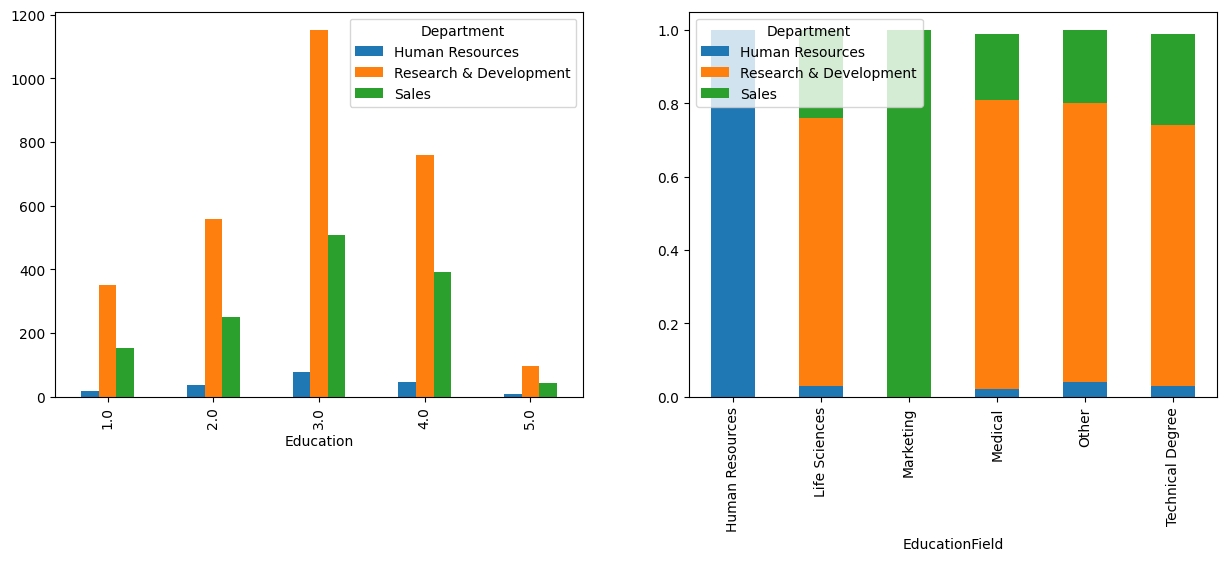

In [ ]:
visualize_column_counts_per_class("Department")




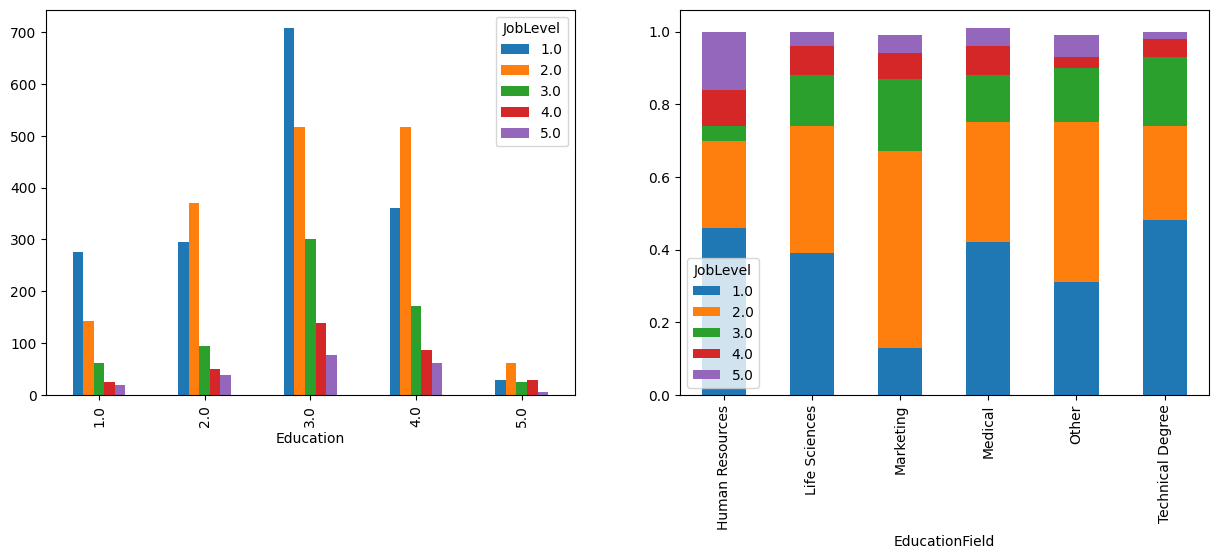

In [ ]:
visualize_column_counts_per_class("JobLevel")

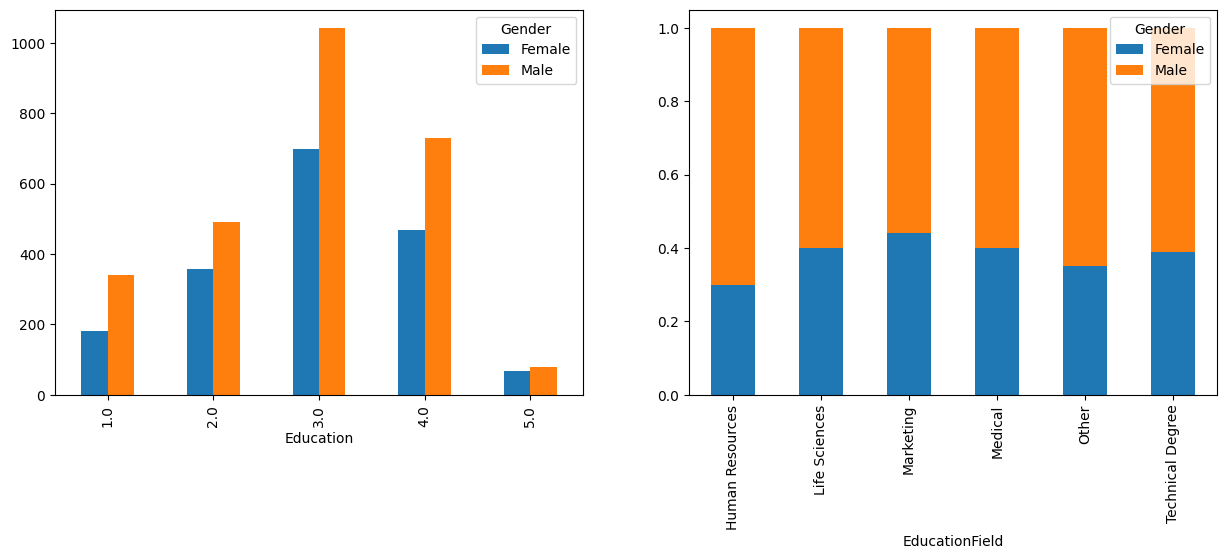

In [ ]:
visualize_column_counts_per_class("Gender")

In [ ]:
def visualize_column_counts_per_class1(column_name):
  # Count each unique value of Var_1 in each target class
  cnt = df2.groupby(["Department"])[column_name].value_counts().unstack()    # tu muszą być wartości numeryczne

  # Percentage of Var_1 unique values in each target class
  percentage = df2.pivot_table(columns=column_name, index="EducationField", values="Department", aggfunc="count")
  percentage = percentage.div(percentage.sum(axis=1), axis=0).round(2)

  # plot count chart
  fig, ax = plt.subplots(1, 2)
  cnt.plot(kind="bar", ax=ax[0], figsize=(15, 5))

  # plot percentage chart
  percentage.plot(kind="bar", ax=ax[1], figsize=(15, 5), stacked=True)

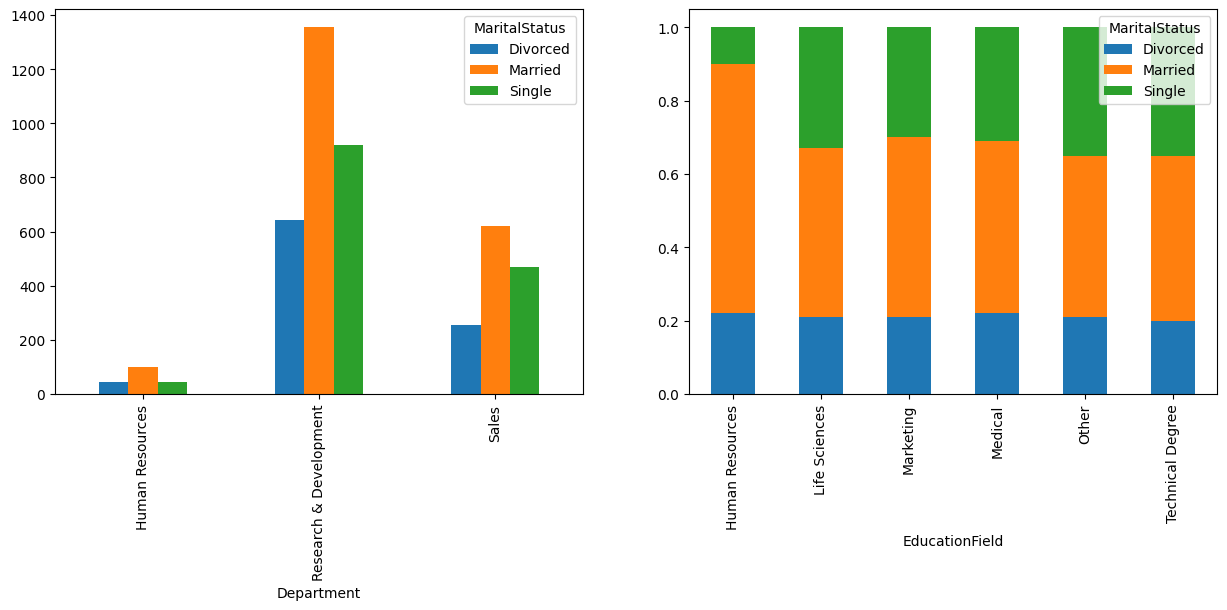

In [ ]:
visualize_column_counts_per_class1("MaritalStatus")

#Obróbka danych w DataFrame df

In [ ]:
df.drop('Over18', axis=1, inplace=True)

df

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,1,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0
1,2,No,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0
2,7,No,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0
3,8,No,13.0,3.0,3.0,80.0,0.0,8.0,2.0,2.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,3068.0,11864.0,0.0
4,11,No,22.0,4.0,2.0,80.0,1.0,1.0,2.0,3.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,2693.0,13335.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,100142,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,...,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,12250.0,1.0
4445,100143,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,...,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0
4446,100144,No,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,...,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0
4447,100145,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,...,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0


Kolumna "Over18" przyjmuje te same wartości dla całego zbioru dlatego została usunięta.

In [ ]:
# convert values to numeric
df["OverTime"].replace((['Yes', 'No']), (1, 0), inplace=True)

df.head()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,1,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0
1,2,0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0
2,7,0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0
3,8,0,13.0,3.0,3.0,80.0,0.0,8.0,2.0,2.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,3068.0,11864.0,0.0
4,11,0,22.0,4.0,2.0,80.0,1.0,1.0,2.0,3.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,2693.0,13335.0,1.0


In [ ]:
df.drop('StandardHours', axis=1, inplace=True)

df

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,3068.0,11864.0,0.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,2693.0,13335.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,100142,0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,...,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,12250.0,1.0
4445,100143,0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,...,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0
4446,100144,0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,...,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0
4447,100145,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,...,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0


In [ ]:
df.drop('EmployeeCount', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   OverTime                  4449 non-null   int64  
 2   PercentSalaryHike         4449 non-null   float64
 3   PerformanceRating         4449 non-null   float64
 4   RelationshipSatisfaction  4449 non-null   float64
 5   StockOptionLevel          4449 non-null   float64
 6   TotalWorkingYears         4449 non-null   float64
 7   TrainingTimesLastYear     4449 non-null   float64
 8   WorkLifeBalance           4449 non-null   float64
 9   YearsAtCompany            4449 non-null   float64
 10  YearsInCurrentRole        4449 non-null   float64
 11  YearsSinceLastPromotion   4449 non-null   float64
 12  YearsWithCurrManager      4449 non-null   float64
 13  Attrition                 4302 non-null   object 
 14  YearlyIn

In [ ]:
#######################################################

df["MonthlyIncome_Bin"] = pd.cut(df.MonthlyIncome, labels=["1000 - 5000", "5001 - 10000", "10001 - 15000", "15001-20000"], bins=[1000, 5000, 10000, 15000, 20000])

#######################################################


# df["DistanceFromHome"] = pd.cut(df.MonthlyIncome, labels=["1000 - 5000", "5001 - 10000", "10001 - 15000", "15001-20000"], bins=[1000, 5000, 10000, 15000, 20000])

In [ ]:
df.MonthlyIncome_Bin.describe()

count            4449
unique              4
top       1000 - 5000
freq             2284
Name: MonthlyIncome_Bin, dtype: object

In [ ]:
df.MonthlyIncome_Bin

0        5001 - 10000
1        5001 - 10000
2         1000 - 5000
3         1000 - 5000
4         1000 - 5000
            ...      
4444      1000 - 5000
4445    10001 - 15000
4446    10001 - 15000
4447     5001 - 10000
4448      1000 - 5000
Name: MonthlyIncome_Bin, Length: 4449, dtype: category
Categories (4, object): ['1000 - 5000' < '5001 - 10000' < '10001 - 15000' < '15001-20000']

In [ ]:
df.drop('MonthlyIncome', axis=1, inplace=True)


MonthlyIncome_Bin_unique = tuple(df.MonthlyIncome_Bin.unique())
df["MonthlyIncome_Bin"].replace(MonthlyIncome_Bin_unique, range(len(MonthlyIncome_Bin_unique)), inplace=True)

df["MonthlyIncome_Bin"] = df["MonthlyIncome_Bin"].astype(float)

df.head()



,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,13335.0,1.0,1.0


In [ ]:
df["MonthlyIncome_Bin"].info()

<class 'pandas.core.series.Series'>
Int64Index: 4449 entries, 0 to 4448
Series name: MonthlyIncome_Bin
Non-Null Count  Dtype  
--------------  -----  
4449 non-null   float64
dtypes: float64(1)
memory usage: 69.5 KB


In [ ]:
# df.loc[(df['DistanceFromHome'] >= 10000), 'DistanceFromHome'] = df["DistanceFromHome"]/1000

# # df.loc[(df['DistanceFromHome'] >= 5000), 'DistanceFromHome'] = df["DistanceFromHome"]/10

# df["DistanceFromHome"].describe()

In [ ]:
#Błędne rozumienie

# df["DistanceFromHome_Bin"] = pd.cut(df.DistanceFromHome, labels=["1 - 250", "251 - 500", "501 - 750", "751-1000"], bins=[0, 250, 500, 750, 1000])


# df.DistanceFromHome_Bin.describe()

# df.DistanceFromHome_Bin

# df.drop('DistanceFromHome', axis=1, inplace=True)

# DistanceFromHome_Bin_unique = tuple(df.DistanceFromHome_Bin.unique())
# df["DistanceFromHome_Bin"].replace(DistanceFromHome_Bin_unique, range(len(DistanceFromHome_Bin_unique)), inplace=True)

# df["DistanceFromHome_Bin"] = df["DistanceFromHome_Bin"].astype(float)

# df["DistanceFromHome_Bin"]

In [ ]:
# df = df.rename(columns={"TotalWorkingYears": "TotalWorkingDays"})

df.loc[(df['TotalWorkingYears'] >= 80), 'TotalWorkingYears'] = df["TotalWorkingYears"]/365

df['TotalWorkingYears'] = df['TotalWorkingYears'].round(0)

df = df.rename(columns={"TrainingTimesLastYear": "TrainingTimesLastYearPerWeek"})

# df = df.rename(columns={"YearsAtCompany": "DaysAtCompany"})

df.loc[(df['YearsAtCompany'] >= 80), 'YearsAtCompany'] = df["YearsAtCompany"]/365

df['YearsAtCompany'] = df['YearsAtCompany'].round(0)

# df = df.rename(columns={"YearsInCurrentRole": "DaysInCurrentRole"})

df.loc[(df['YearsInCurrentRole'] >= 80), 'YearsInCurrentRole'] = df["YearsInCurrentRole"]/365

df['YearsInCurrentRole'] = df['YearsInCurrentRole'].round(0)

# df = df.rename(columns={"YearsSinceLastPromotion": "DaysSinceLastPromotion"})

df.loc[(df['YearsSinceLastPromotion'] >= 80), 'YearsSinceLastPromotion'] = df["YearsSinceLastPromotion"]/365

df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].round(0)

# df = df.rename(columns={"YearsWithCurrManager": "DaysWithCurrManager"})

df.loc[(df['YearsWithCurrManager'] >= 80), 'YearsWithCurrManager'] = df["YearsWithCurrManager"]/365

df['YearsWithCurrManager'] = df['YearsWithCurrManager'].round(0)

df

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,13335.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,100142,0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,...,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,12250.0,1.0,1.0
4445,100143,0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,...,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,5640.0,0.0,3.0
4446,100144,0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,...,Male,83.0,3.0,3.0,Research Director,1.0,Married,14842.0,9.0,3.0
4447,100145,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,...,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,14075.0,1.0,0.0


In [ ]:
df.YearsWithCurrManager.describe()

count    4449.000000
mean        4.745786
std         4.591826
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        27.000000
Name: YearsWithCurrManager, dtype: float64

In [ ]:
#unikalne wartości w kolumnie '#  'Attrition',
df.Attrition.unique()
# df3.Attrition.info()
# df3.Attrition.nunique()



array(['Yes', 'No', nan], dtype=object)

In [ ]:
df['Age']

0       41.0
1       49.0
2       27.0
3       32.0
4       30.0
        ... 
4444    35.0
4445    41.0
4446    42.0
4447    44.0
4448    44.0
Name: Age, Length: 4449, dtype: float64

In [ ]:
df.loc[(df['Age'] >= 1800), 'Age'] = df["Age"]/100

df.loc[(df['Age'] > 110) & (df['Age'] < 1800), 'Age'] = 18

In [ ]:
df['Age'] = df['Age'].round(0)

In [ ]:
df['Age']

df['Age'].max()

99.0

In [ ]:
df['YearsAtCompany'].unique()

# TotalWorkingYears
# YearsAtCompany
# YearsInCurrentRole
# YearsSinceLastPromotion
# YearsWithCurrManager



array([ 6., 10.,  2.,  7.,  1.,  9.,  5.,  4., 25.,  3., 12.,  0., 14.,
       22., 27., 21., 17., 11., 15., 13., 37., 16.,  8., 20., 40., 24.,
       33., 19., 36., 18., 29., 31., 32., 34., 26., 30., 23.])

In [ ]:
df['YearsSinceLastPromotion'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  8.,  6.,  5., 15.,  7.,  9., 13., 12.,
       10., 11., 14., 22., 20., 19., 23., 26., 24., 27., 16., 17., 18.,
       21., 25.])

In [ ]:
df['YearsInCurrentRole'].unique()

array([ 4.,  7.,  2.,  0.,  5.,  9.,  8.,  3.,  6., 13.,  1., 15., 16.,
       14., 11., 10., 12., 18., 17., 19., 26., 22., 23., 20., 24., 25.,
       21., 27.])

In [ ]:
df.BusinessTravel.unique()

BusinessTravel_unique = tuple(df.BusinessTravel.unique())
df["BusinessTravel"].replace(BusinessTravel_unique, range(len(BusinessTravel_unique)), inplace=True)

df.head()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,13335.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EmployeeNumber                4449 non-null   int64  
 1   OverTime                      4449 non-null   int64  
 2   PercentSalaryHike             4449 non-null   float64
 3   PerformanceRating             4449 non-null   float64
 4   RelationshipSatisfaction      4449 non-null   float64
 5   StockOptionLevel              4449 non-null   float64
 6   TotalWorkingYears             4449 non-null   float64
 7   TrainingTimesLastYearPerWeek  4449 non-null   float64
 8   WorkLifeBalance               4449 non-null   float64
 9   YearsAtCompany                4449 non-null   float64
 10  YearsInCurrentRole            4449 non-null   float64
 11  YearsSinceLastPromotion       4449 non-null   float64
 12  YearsWithCurrManager          4449 non-null   float64
 13  Att

In [ ]:
df.Department.unique()

Department_unique = tuple(df.Department.unique())
df["Department"].replace(Department_unique, range(len(Department_unique)), inplace=True)

df.head()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,13335.0,1.0,1.0


In [ ]:
df.EducationField.unique()

EducationField_unique = tuple(df.EducationField.unique())
df["EducationField"].replace(EducationField_unique, range(len(EducationField_unique)), inplace=True)

df.head()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,13335.0,1.0,1.0


In [ ]:
# convert values to numeric
df["Gender"].replace((['Male', 'Female']), (1, 0), inplace=True)

df.head()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,0,94.0,3.0,2.0,Sales Executive,4.0,Single,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,1,61.0,2.0,2.0,Research Scientist,2.0,Married,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,1,40.0,3.0,1.0,Laboratory Technician,2.0,Married,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,1,79.0,3.0,1.0,Laboratory Technician,4.0,Single,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,1,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,13335.0,1.0,1.0


In [ ]:
df.JobRole.unique()

JobRole_unique = tuple(df.JobRole.unique())
df["JobRole"].replace(JobRole_unique, range(len(JobRole_unique)), inplace=True)

df

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,0,94.0,3.0,2.0,0,4.0,Single,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,1,61.0,2.0,2.0,1,2.0,Married,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,1,40.0,3.0,1.0,2,2.0,Married,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,1,79.0,3.0,1.0,2,4.0,Single,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,1,67.0,3.0,1.0,2,3.0,Divorced,13335.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,100142,0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,...,0,52.0,3.0,2.0,7,3.0,Married,12250.0,1.0,1.0
4445,100143,0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,...,0,60.0,2.0,4.0,3,2.0,Married,5640.0,0.0,3.0
4446,100144,0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,...,1,83.0,3.0,3.0,6,1.0,Married,14842.0,9.0,3.0
4447,100145,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,...,0,73.0,3.0,3.0,7,4.0,Married,14075.0,1.0,0.0


In [ ]:
df.MaritalStatus.unique()

MaritalStatus_unique = tuple(df.MaritalStatus.unique())
df["MaritalStatus"].replace(MaritalStatus_unique, range(len(MaritalStatus_unique)), inplace=True)

df.head()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,0,94.0,3.0,2.0,0,4.0,0,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,1,61.0,2.0,2.0,1,2.0,1,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,1,40.0,3.0,1.0,2,2.0,1,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,1,79.0,3.0,1.0,2,4.0,0,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,1,67.0,3.0,1.0,2,3.0,2,13335.0,1.0,1.0


In [ ]:
######################Ważna######################################

#df[df.isna().any(axis=1)]
#wycięcie datafrmau dla danych dla tych brakujących EmployeeNumber (100000 - 100146)
df_reserved = df[df.isna().any(axis=1)]

display(df_reserved)

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
4302,100000,0,11.0,3.0,4.0,0.0,6.0,3.0,2.0,6.0,...,0,53.0,2.0,1.0,1,1.0,0,17852.0,1.0,1.0
4303,100001,1,12.0,3.0,2.0,0.0,4.0,2.0,2.0,4.0,...,0,85.0,3.0,1.0,1,2.0,0,20938.0,1.0,1.0
4304,100002,1,12.0,3.0,3.0,2.0,5.0,3.0,3.0,5.0,...,0,42.0,3.0,2.0,0,3.0,1,15211.0,1.0,1.0
4305,100003,0,13.0,3.0,4.0,1.0,9.0,6.0,3.0,9.0,...,1,69.0,3.0,3.0,0,2.0,2,24666.0,1.0,0.0
4306,100004,1,13.0,3.0,3.0,0.0,10.0,2.0,2.0,10.0,...,1,63.0,3.0,1.0,1,4.0,0,5207.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,100142,0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,...,0,52.0,3.0,2.0,7,3.0,1,12250.0,1.0,1.0
4445,100143,0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,...,0,60.0,2.0,4.0,3,2.0,1,5640.0,0.0,3.0
4446,100144,0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,...,1,83.0,3.0,3.0,6,1.0,1,14842.0,9.0,3.0
4447,100145,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,...,0,73.0,3.0,3.0,7,4.0,1,14075.0,1.0,0.0


In [ ]:
###################### tu usuwanie nanów ###########################
df = df.dropna(how="any", axis=0)

df[df.isna().any(axis=1)]

#brak nanów

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin


In [ ]:
# convert values to numeric
df["Attrition"].replace((['Yes', 'No']), (1, 0), inplace=True)

df.head()

<ipython-input-4932-0ee2a7a47060>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition"].replace((['Yes', 'No']), (1, 0), inplace=True)


,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,...,0,94.0,3.0,2.0,0,4.0,0,19479.0,8.0,0.0
1,2,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,...,1,61.0,2.0,2.0,1,2.0,1,24907.0,1.0,0.0
2,7,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,...,1,40.0,3.0,1.0,2,2.0,1,16632.0,9.0,1.0
3,8,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,...,1,79.0,3.0,1.0,2,4.0,0,11864.0,0.0,1.0
4,11,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,...,1,67.0,3.0,1.0,2,3.0,2,13335.0,1.0,1.0


In [ ]:
df.drop('EmployeeNumber', axis=1, inplace=True)

<ipython-input-4933-e460a5fe1427>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('EmployeeNumber', axis=1, inplace=True)


# do sprawdzania

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4301
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OverTime                      4302 non-null   int64  
 1   PercentSalaryHike             4302 non-null   float64
 2   PerformanceRating             4302 non-null   float64
 3   RelationshipSatisfaction      4302 non-null   float64
 4   StockOptionLevel              4302 non-null   float64
 5   TotalWorkingYears             4302 non-null   float64
 6   TrainingTimesLastYearPerWeek  4302 non-null   float64
 7   WorkLifeBalance               4302 non-null   float64
 8   YearsAtCompany                4302 non-null   float64
 9   YearsInCurrentRole            4302 non-null   float64
 10  YearsSinceLastPromotion       4302 non-null   float64
 11  YearsWithCurrManager          4302 non-null   float64
 12  Attrition                     4302 non-null   int64  
 13  Yea

In [ ]:
df.describe()

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,...,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,0.281962,15.164110,3.146444,2.725709,0.787773,11.480707,2.803347,2.765923,7.380056,4.907950,...,0.603208,66.036495,2.741516,2.051604,2.624128,2.722920,0.891911,14266.381450,2.677359,0.990702
std,0.450007,3.624112,0.353591,1.079747,0.849147,7.840984,1.302586,0.708878,6.362885,4.675013,...,0.489289,20.298352,0.711379,1.102569,2.432976,1.106692,0.722756,7154.584275,2.490632,0.886178
min,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2094.000000,0.000000,0.000000
25%,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,...,0.000000,48.000000,2.000000,1.000000,1.000000,2.000000,0.000000,7910.250000,1.000000,0.000000
50%,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,...,1.000000,66.000000,3.000000,2.000000,2.000000,3.000000,1.000000,14174.000000,2.000000,1.000000
75%,1.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,...,1.000000,84.000000,3.000000,3.000000,4.000000,4.000000,1.000000,20471.000000,4.000000,1.000000
max,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,27.000000,...,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,26999.000000,9.000000,3.000000


# Przygotowanie X_Test z "df_reserved"

In [ ]:
df_reserved.head()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
4302,100000,0,11.0,3.0,4.0,0.0,6.0,3.0,2.0,6.0,...,0,53.0,2.0,1.0,1,1.0,0,17852.0,1.0,1.0
4303,100001,1,12.0,3.0,2.0,0.0,4.0,2.0,2.0,4.0,...,0,85.0,3.0,1.0,1,2.0,0,20938.0,1.0,1.0
4304,100002,1,12.0,3.0,3.0,2.0,5.0,3.0,3.0,5.0,...,0,42.0,3.0,2.0,0,3.0,1,15211.0,1.0,1.0
4305,100003,0,13.0,3.0,4.0,1.0,9.0,6.0,3.0,9.0,...,1,69.0,3.0,3.0,0,2.0,2,24666.0,1.0,0.0
4306,100004,1,13.0,3.0,3.0,0.0,10.0,2.0,2.0,10.0,...,1,63.0,3.0,1.0,1,4.0,0,5207.0,1.0,1.0


In [ ]:
df_reserved.drop('EmployeeNumber', axis=1, inplace=True)

df_reserved.pop('Attrition')

df_reserved.head()


<ipython-input-4937-0fd46530733a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reserved.drop('EmployeeNumber', axis=1, inplace=True)


,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
4302,0,11.0,3.0,4.0,0.0,6.0,3.0,2.0,6.0,5.0,...,0,53.0,2.0,1.0,1,1.0,0,17852.0,1.0,1.0
4303,1,12.0,3.0,2.0,0.0,4.0,2.0,2.0,4.0,3.0,...,0,85.0,3.0,1.0,1,2.0,0,20938.0,1.0,1.0
4304,1,12.0,3.0,3.0,2.0,5.0,3.0,3.0,5.0,4.0,...,0,42.0,3.0,2.0,0,3.0,1,15211.0,1.0,1.0
4305,0,13.0,3.0,4.0,1.0,9.0,6.0,3.0,9.0,5.0,...,1,69.0,3.0,3.0,0,2.0,2,24666.0,1.0,0.0
4306,1,13.0,3.0,3.0,0.0,10.0,2.0,2.0,10.0,9.0,...,1,63.0,3.0,1.0,1,4.0,0,5207.0,1.0,1.0


In [ ]:
df_reserved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 4302 to 4448
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OverTime                      147 non-null    int64  
 1   PercentSalaryHike             147 non-null    float64
 2   PerformanceRating             147 non-null    float64
 3   RelationshipSatisfaction      147 non-null    float64
 4   StockOptionLevel              147 non-null    float64
 5   TotalWorkingYears             147 non-null    float64
 6   TrainingTimesLastYearPerWeek  147 non-null    float64
 7   WorkLifeBalance               147 non-null    float64
 8   YearsAtCompany                147 non-null    float64
 9   YearsInCurrentRole            147 non-null    float64
 10  YearsSinceLastPromotion       147 non-null    float64
 11  YearsWithCurrManager          147 non-null    float64
 12  YearlyIncome                  147 non-null    float64
 13  A

#Trening modelu

In [ ]:
y_train = df.pop('Attrition')

X_train = df

y_test = df4['Attrition']

X_test = df_reserved

In [ ]:
display(X_test)

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
4302,0,11.0,3.0,4.0,0.0,6.0,3.0,2.0,6.0,5.0,...,0,53.0,2.0,1.0,1,1.0,0,17852.0,1.0,1.0
4303,1,12.0,3.0,2.0,0.0,4.0,2.0,2.0,4.0,3.0,...,0,85.0,3.0,1.0,1,2.0,0,20938.0,1.0,1.0
4304,1,12.0,3.0,3.0,2.0,5.0,3.0,3.0,5.0,4.0,...,0,42.0,3.0,2.0,0,3.0,1,15211.0,1.0,1.0
4305,0,13.0,3.0,4.0,1.0,9.0,6.0,3.0,9.0,5.0,...,1,69.0,3.0,3.0,0,2.0,2,24666.0,1.0,0.0
4306,1,13.0,3.0,3.0,0.0,10.0,2.0,2.0,10.0,9.0,...,1,63.0,3.0,1.0,1,4.0,0,5207.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,11.0,...,0,52.0,3.0,2.0,7,3.0,1,12250.0,1.0,1.0
4445,0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,7.0,...,0,60.0,2.0,4.0,3,2.0,1,5640.0,0.0,3.0
4446,0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,7.0,...,1,83.0,3.0,3.0,6,1.0,1,14842.0,9.0,3.0
4447,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,...,0,73.0,3.0,3.0,7,4.0,1,14075.0,1.0,0.0


In [ ]:
# display(X_test)

In [ ]:
display(y_train)

0       1
1       0
2       0
3       0
4       0
       ..
4297    1
4298    1
4299    1
4300    1
4301    1
Name: Attrition, Length: 4302, dtype: int64

In [ ]:
display(X_train)

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYearPerWeek,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,MonthlyIncome_Bin
0,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,...,0,94.0,3.0,2.0,0,4.0,0,19479.0,8.0,0.0
1,0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,...,1,61.0,2.0,2.0,1,2.0,1,24907.0,1.0,0.0
2,0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,...,1,40.0,3.0,1.0,2,2.0,1,16632.0,9.0,1.0
3,0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,7.0,...,1,79.0,3.0,1.0,2,4.0,0,11864.0,0.0,1.0
4,0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,...,1,67.0,3.0,1.0,2,3.0,2,13335.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,...,0,73.0,3.0,3.0,7,4.0,1,14075.0,1.0,0.0
4298,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,...,0,73.0,3.0,3.0,7,4.0,1,14075.0,1.0,0.0
4299,0,14.0,3.0,3.0,0.0,9.0,5.0,3.0,5.0,2.0,...,1,49.0,1.0,1.0,2,3.0,0,2104.0,2.0,1.0
4300,0,14.0,3.0,3.0,0.0,9.0,5.0,3.0,5.0,2.0,...,1,49.0,1.0,1.0,2,3.0,0,2104.0,2.0,1.0


In [ ]:
# import numpy as np
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train, y_train)


In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=30, max_iter=200)
# model.fit(X_train, y_train)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1, random_state=0)
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)

In [ ]:
# import xgboost
# model = xgboost.XGBClassifier()

# # model = xgboost.XGBClassifier(
# #     max_depth=3,
# #     learning_rate=0.1,
# #     n_estimators=100,
# #     seed=42
# # )

# model.fit(X_train, y_train)

In [ ]:
# X_pred = df_reserved

# df_reserved

y_pred = model.predict(X_test)


print(y_pred)
print(y_test)

[0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1]
0      0
1      0
2      0
3      0
4      1
      ..
142    0
143    0
144    0
145    1
146    0
Name: Attrition, Length: 147, dtype: int64


In [ ]:
#do weryfikacji jeszcze

y_pred_train = model.predict(X_train)

print(y_pred_train)

[1 0 0 ... 1 1 1]


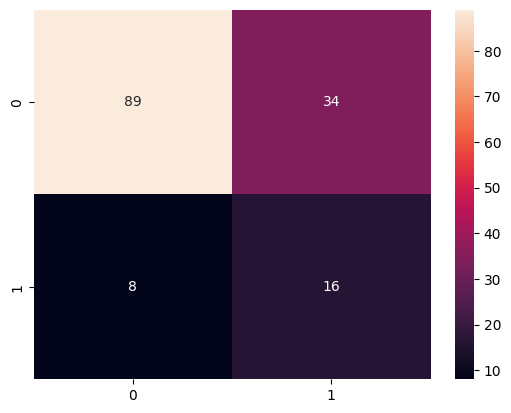

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

cm_train = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
cm_train

array([[89, 34],
       [ 8, 16]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.6269177126917713
Precision: 0.6436888681881695
Recall: 0.621962196219622
F1-Score: 0.6326390478370336


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.7142857142857143
Precision: 0.32
Recall: 0.6666666666666666
F1-Score: 0.43243243243243246


In [ ]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.626918
1,test,accuracy,0.714286
2,train,precision,0.643689
3,test,precision,0.320000
4,train,recall,0.621962
5,test,recall,0.666667
6,train,f1,0.632639
7,test,f1,0.432432


In [ ]:
df

,accuracy,precision,recall,f1
train,0.626918,0.643689,0.621962,0.632639
test,0.714286,0.320000,0.666667,0.432432


<Axes: xlabel='metric', ylabel='value'>

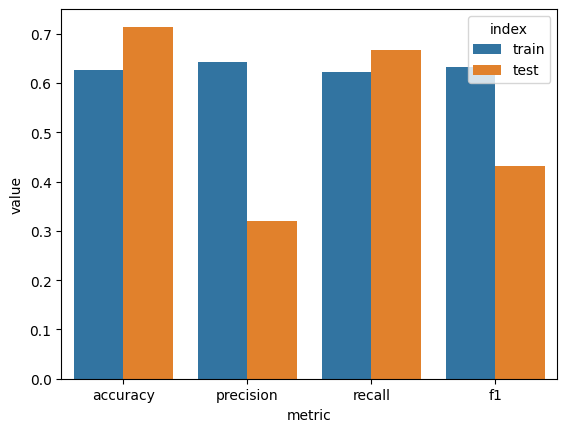

In [ ]:
sns.barplot(x='metric', y='value', hue='index', data=melted)